Subsetting utilities
================

`clisops` comes with some utilities to perform common tasks that are either not implemented in xarray, or that are implemented but do not have the generality needed for climate science work. Here we show examples of the `clisops.core.subset` submodule.

In [1]:
import intake
%matplotlib inline
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
import xarray as xr
import xesmf as xe
from clisops.core import subset
import clisops as cl
print("Using roocs/clisops in version %s" % cl.__version__)
print("Using xESMF in version %s" % xe.__version__)

xr.set_options(display_style='html')
col_url = "/home/dkrz/k204212/git/intake-esm/mistral-cmip6.json"
col = intake.open_esm_datastore(col_url)

Using roocs/clisops in version 0.3.1
Using xESMF in version 0.3.0


In [2]:
col

,unique
activity_id,21
institution_id,40
source_id,102
experiment_id,211
member_id,397
table_id,38
variable_id,1153
grid_label,12
dcpp_init_year,60
version,426


In [3]:
cat = col.search(activity_id="ScenarioMIP", 
                 source_id="MPI-ESM1-2-HR",
                 experiment_id="ssp126", 
                 member_id="r1i1p1f1", 
                 variable_id="tas",
                 table_id="Amon",
                 time_range="210001-210012")

In [4]:
cat.df

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,dcpp_init_year,version,time_range,path
0,ScenarioMIP,DKRZ,MPI-ESM1-2-HR,ssp126,r1i1p1f1,Amon,tas,gn,NaN,v20190710,210001-210012,/mnt/lustre02/work/ik1017/CMIP6/data/CMIP6/Sce...


In [5]:
dset_dict = cat.to_dataset_dict(zarr_kwargs={'consolidated': True, 'decode_times': False}, 
                                cdf_kwargs={'chunks': {}, 'decode_times': False})

dset_dict.keys()


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


dict_keys(['ScenarioMIP.DKRZ.MPI-ESM1-2-HR.ssp126.Amon.gn'])

In [6]:
ds = dset_dict['ScenarioMIP.DKRZ.MPI-ESM1-2-HR.ssp126.Amon.gn']
#rename_dict={"lat_bnds": "lat_b", "lon_bnds": "lon_b"}
#ds=ds.rename(rename_dict)
ds

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 192, lon: 384, member_id: 1, time: 12)
Coordinates:
    height     float64 ...
  * time       (time) float64 9.133e+04 9.136e+04 ... 9.163e+04 9.166e+04
  * lon        (lon) float64 0.0 0.9375 1.875 2.812 ... 356.2 357.2 358.1 359.1
  * lat        (lat) float64 -89.28 -88.36 -87.42 -86.49 ... 87.42 88.36 89.28
  * member_id  (member_id) <U8 'r1i1p1f1'
Dimensions without coordinates: bnds
Data variables:
    lon_bnds   (lon, bnds) float64 dask.array<chunksize=(384, 2), meta=np.ndarray>
    time_bnds  (time, bnds) float64 dask.array<chunksize=(12, 2), meta=np.ndarray>
    lat_bnds   (lat, bnds) float64 dask.array<chunksize=(192, 2), meta=np.ndarray>
    tas        (member_id, time, lat, lon) float32 dask.array<chunksize=(1, 12, 192, 384), meta=np.ndarray>
Attributes:
    Conventions:             CF-1.7 CMIP-6.2
    activity_id:             ScenarioMIP
    branch_method:           standard
    branch_time_in_child:    60265.0
    branch_time_in_parent:   60265.0
    contact:                 cmip6-mpi-esm@dkrz.de
    creation_date:           2019-07-23T07:34:35Z
    data_specs_version:      01.00.30
    experiment:              update of RCP2.6 based on SSP1
    experiment_id:           ssp126
    external_variables:      areacella
    forcing_index:           1
    frequency:               mon
    further_info_url:        https://furtherinfo.es-doc.org/CMIP6.DKRZ.MPI-ES...
    grid:                    gn
    grid_label:              gn
    history:                 2019-07-23T07:34:35Z ; CMOR rewrote data to be c...
    initialization_index:    1
    institution:             Deutsches Klimarechenzentrum, Hamburg 20146, Ger...
    institution_id:          DKRZ
    mip_era:                 CMIP6
    nominal_resolution:      100 km
    parent_activity_id:      CMIP
    parent_experiment_id:    historical
    parent_mip_era:          CMIP6
    parent_source_id:        MPI-ESM1-2-HR
    parent_time_units:       days since 1850-1-1 00:00:00
    parent_variant_label:    r1i1p1f1
    physics_index:           1
    product:                 model-output
    project_id:              CMIP6
    realization_index:       1
    realm:                   atmos
    references:              MPI-ESM: Mauritsen, T. et al. (2019), Developmen...
    source:                  MPI-ESM1.2-HR (2017): \naerosol: none, prescribe...
    source_id:               MPI-ESM1-2-HR
    source_type:             AOGCM
    sub_experiment:          none
    sub_experiment_id:       none
    table_id:                Amon
    table_info:              Creation Date:(09 May 2019) MD5:e6ef8ececc8f3386...
    title:                   MPI-ESM1-2-HR output prepared for CMIP6
    variable_id:             tas
    variant_label:           r1i1p1f1
    license:                 CMIP6 model data produced by DKRZ is licensed un...
    cmor_version:            3.4.0
    tracking_id:             hdl:21.14100/757882d7-76f5-4bf6-8661-7f41e77c13c9
    intake_esm_varname:      ['tas']
    intake_esm_dataset_key:  ScenarioMIP.DKRZ.MPI-ESM1-2-HR.ssp126.Amon.gn

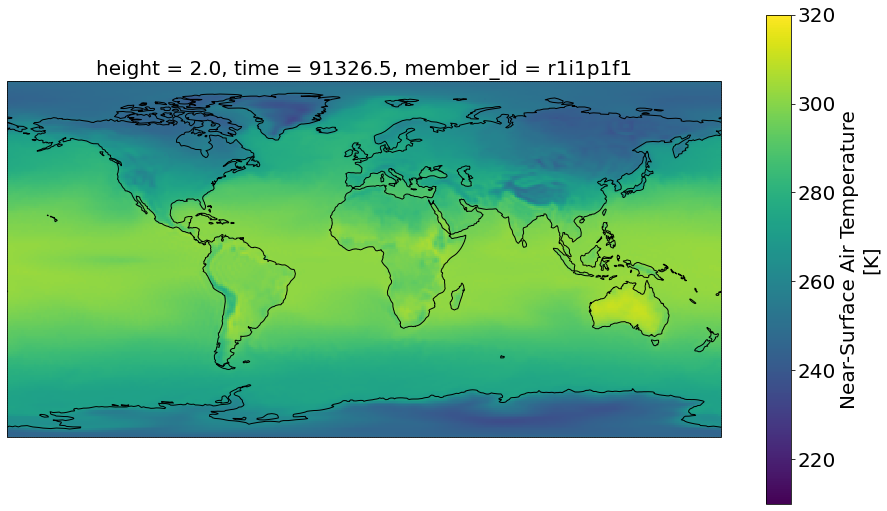

In [7]:
SMALL_SIZE = 20
MEDIUM_SIZE = 30
BIGGER_SIZE = 35
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=SMALL_SIZE)  # fontsize of the figure title

#ds.tas.isel(time=0).plot()
#dr=ds["tas"]
fig=plt.figure(figsize=(16,9))
ax = plt.axes(projection=ccrs.PlateCarree())
ds["tas"].isel(time=0, member_id=0).plot.pcolormesh(ax=ax, vmin=210, vmax=320)
ax.coastlines()

In [8]:
ds['lat'].values, ds['lon'].values
#ds['lat']
#ds['lon']

(array([-89.28422753, -88.35700352, -87.42430375, -86.49036677,
        -85.55596048, -84.62132711, -83.68656682, -82.75172847,
        -81.81683873, -80.88191335, -79.94696225, -79.01199198,
        -78.07700705, -77.14201066, -76.20700512, -75.27199218,
        -74.33697317, -73.40194911, -72.46692081, -71.53188891,
        -70.59685394, -69.66181631, -68.72677638, -67.79173443,
        -66.85669072, -65.92164545, -64.9865988 , -64.05155091,
        -63.11650191, -62.18145192, -61.24640103, -60.31134933,
        -59.3762969 , -58.44124379, -57.50619007, -56.57113579,
        -55.636081  , -54.70102573, -53.76597003, -52.83091393,
        -51.89585745, -50.96080063, -50.02574349, -49.09068605,
        -48.15562834, -47.22057036, -46.28551215, -45.3504537 ,
        -44.41539505, -43.4803362 , -42.54527717, -41.61021796,
        -40.67515858, -39.74009906, -38.80503939, -37.86997958,
        -36.93491964, -35.99985958, -35.06479941, -34.12973913,
        -33.19467875, -32.25961827, -31.

## subset_bbox : using a latitude-longitude bounding box

In the previous example notebook, we used xarray's `.sel()` to cut a lat-lon subset of our data. clisops offers the same utility, but with more generality. For example, if we mindlessly try xarray's method on our dataset:

In [9]:
ds.sel(lat=slice(70, 35), lon=slice(-25, 45)).coords

Coordinates:
    height     float64 ...
  * time       (time) float64 9.133e+04 9.136e+04 ... 9.163e+04 9.166e+04
  * lon        (lon) float64 0.0 0.9375 1.875 2.812 ... 42.19 43.12 44.06 45.0
  * lat        (lat) float64 
  * member_id  (member_id) <U8 'r1i1p1f1'

As you can see, `lat` is empty and for `lon` not all values have been selected. In this dataset, the lats are defined in ascending order and lons are in the range \[0, 360[ instead of [-180, 180[, which is why xarray's method did not return the expected result. clisops understands these nuances:

In [10]:
ds_sel=subset.subset_bbox(ds, lat_bnds=[70, 35]) #, lon_bnds=[-25, 45])
#ds_sel=subset.subset_bbox(ds, lat_bnds=[35, 70]) #, lon_bnds=[-25, 45])
ds_sel.coords

Coordinates:
    height     float64 ...
  * time       (time) float64 9.133e+04 9.136e+04 ... 9.163e+04 9.166e+04
  * lon        (lon) float64 0.0 0.9375 1.875 2.812 ... 356.2 357.2 358.1 359.1
  * lat        (lat) float64 
  * member_id  (member_id) <U8 'r1i1p1f1'

In [ ]:
ds_out = xr.Dataset({'lat': (['lat'], np.arange(35, 70, 3.0)),
                     'lon': (['lon'], np.append(np.arange(2, 45, 3.0),np.arange(360-25, 360, 3.0))),
                    }
                   )
ds_out

In [ ]:
regridder = xe.Regridder(ds, ds_out, 'bilinear', reuse_weights=False)
regridder  # print basic regridder information.

In [ ]:
dr_out = regridder(ds['tas'])
dr_out

In [ ]:
#dr_out.isel(time=0).plot()
fig=plt.figure(figsize=(16,9))
ax = plt.axes(projection=ccrs.PlateCarree())
dr_out.isel(time=0, member_id=0).plot.pcolormesh(ax=ax, vmin=210, vmax=320);
ax.coastlines()

In [ ]:
regridder.clean_weight_file()